In [92]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Importing Data

In [16]:
df= pd.read_csv('historical_automobile_sales.csv')

In [93]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [94]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Task1 :Create a Line chart using the functionality of pandas to show how car sales fluctuate from year to year

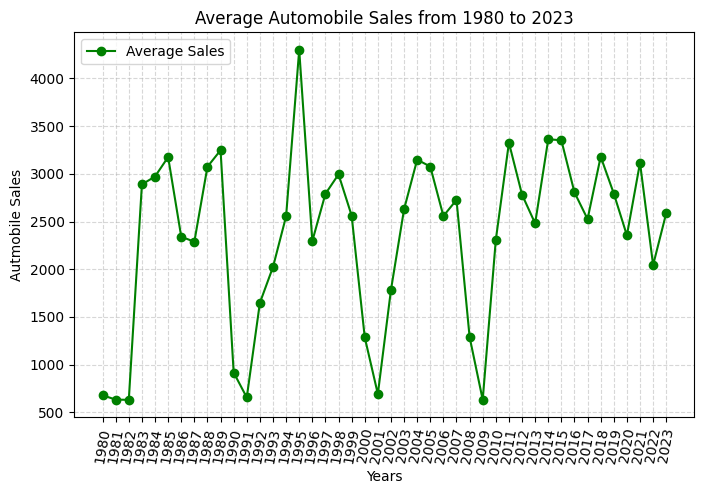

In [95]:
years= list(map(int, range(1980, 2024)))
dfL = df.groupby('Year')['Automobile_Sales'].mean()

plt.figure(figsize=(8,5))
dfL.plot(kind='line',
         color='green',
         marker='o')
plt.title('Average Automobile Sales from 1980 to 2023')
plt.xlabel('Years')
plt.ylabel('Autmobile Sales')

plt.xticks(years, rotation=80)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(['Average Sales'], loc='upper left')
plt.show()

### Task 2: Draw different lines for different vehicle type categories and visualise and analyse the differences in sales trends between different vehicle types during recessionary periods.

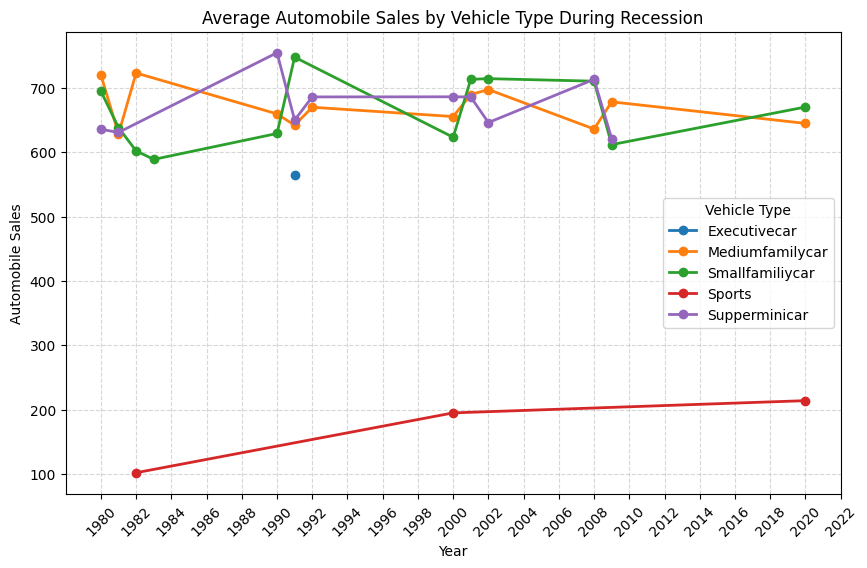

In [96]:
df_rec= df[df['Recession']== 1]

dfL2= df_rec.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
dfL2.set_index('Year', inplace=True)
dfL2 = dfL2.groupby(['Vehicle_Type'])['Automobile_Sales']

plt.figure(figsize=(10,6))
dfL2.plot(kind='line',
          marker='o',
          linewidth=2)
plt.title('Average Automobile Sales by Vehicle Type During Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

plt.xticks(years[::2], rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(title= 'Vehicle Type')

plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

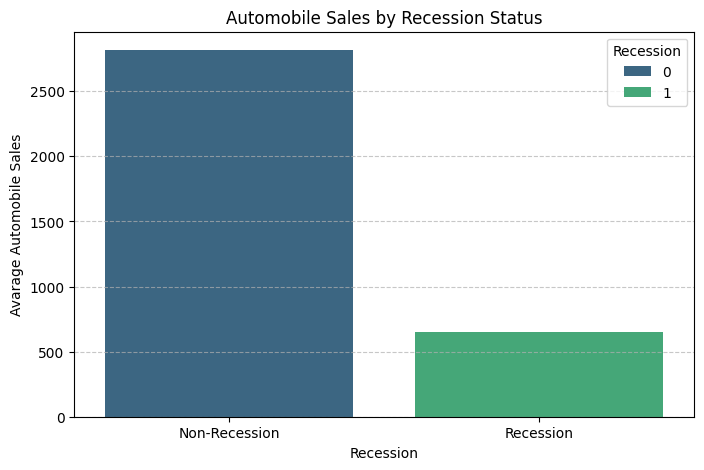

In [97]:
df_sea = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=df_sea,
            x='Recession',
            y='Automobile_Sales',
            palette='viridis',
            hue='Recession')

plt.ylabel('Avarage Automobile Sales')
plt.title('Automobile Sales by Recession Status')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'], fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

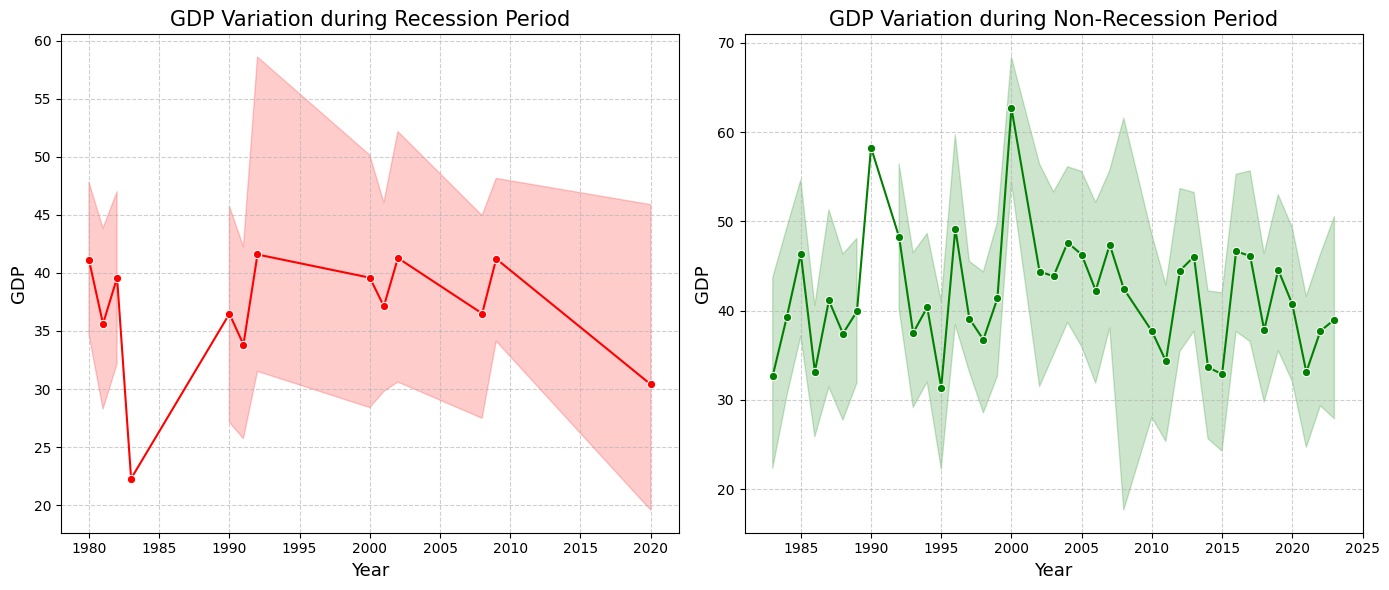

In [98]:
df_rec1 = df[df['Recession'] == 1]
df_rec0 = df[df['Recession'] == 0]

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=df_rec1,
             x='Year',
             y='GDP',
             ax=ax0,
             color='red',
             marker='o')

ax0.set_xlabel('Year', fontsize=13)
ax0.set_ylabel('GDP', fontsize=13)
ax0.set_title('GDP Variation during Recession Period', fontsize=15)
ax0.grid(True, linestyle='--', alpha=0.6)


sns.lineplot(data=df_rec0,
             x='Year',
             y='GDP',
             ax=ax1,
             color='green',
             marker='o')

ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('GDP', fontsize=13)
ax1.set_title('GDP Variation during Non-Recession Period', fontsize=15)
ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

 ### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

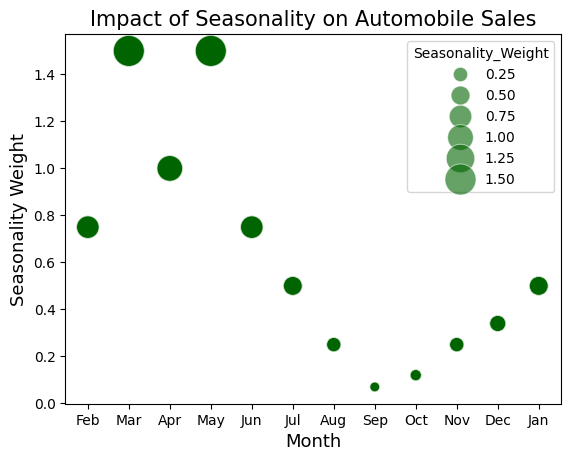

In [99]:
df_rec0 =df[df['Recession']== 0]

size = df_rec0['Seasonality_Weight']

sns.scatterplot(data=df_rec0,
                x='Month',
                y='Seasonality_Weight',
                size=size,
                sizes=(50, 500),
                color='darkgreen',
                alpha=0.6)

plt.xlabel('Month', fontsize=13)
plt.ylabel('Seasonality Weight', fontsize=13)
plt.title('Impact of Seasonality on Automobile Sales', fontsize=15)
plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 

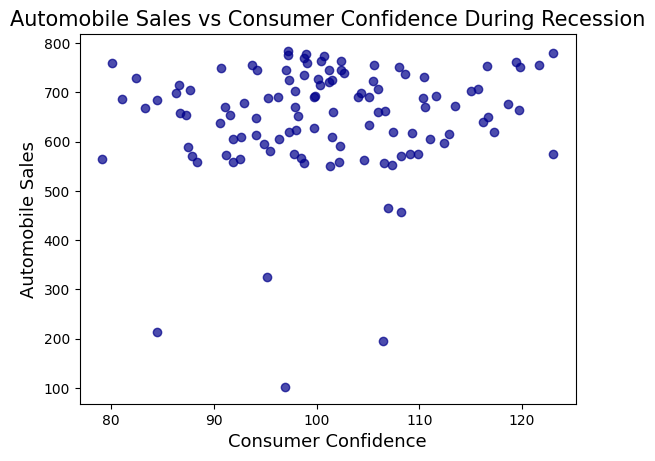

In [100]:
df_rec1 =df[df['Recession']== 1]

plt.scatter(x=df_rec1['Consumer_Confidence'],
            y=df_rec1['Automobile_Sales'],
            color='darkblue',
            alpha=0.7)

plt.xlabel('Consumer Confidence', fontsize=13)
plt.ylabel('Automobile Sales', fontsize=13)
plt.title('Automobile Sales vs Consumer Confidence During Recession', fontsize=15)

plt.show()